# SOLUTION OF TP 02

### 1- Choix de la représentation de la solution:   bien orientée centres de clusters

### import necessary libraries

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.metrics import pairwise_distances_argmin_min
import matplotlib.pyplot as plt
import pandas as pd

### Load Iris dataset

In [2]:

iris = load_iris()
X = iris.data
print(X.shape)
target = load_iris().target

# Convertir Iris Dataset au pandas dataframe
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
df_iris['Target'] = iris.target

df_iris.head()

(150, 4)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
df_iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


### Parameters


In [4]:
k = 3  # Number of clusters
population_size = 10  # Population size
max_iterations = 100  # Maximum number of iterations
k_parents = 5  # Number of parents to select
max_stagnation = 3  # Maximum number of iterations without improvement

### 2- Initialisation aléatoire de NP solutions


In [5]:
def initialize_centers(X, k):
    n_samples, n_features = X.shape
    centers = np.zeros((k, n_features))
    for i in range(k):
        center = X[np.random.choice(range(n_samples))]
        centers[i] = center
    return centers

### 3- Evaluation de la fitness de chaque solution

In [6]:
def generate_initial_population(X, k, population_size):
    population = [initialize_centers(X, k) for _ in range(population_size)]
    return population

def intra_cluster_fitness(X, centers):
    closest_centers, _ = pairwise_distances_argmin_min(X, centers)
    inertia = sum(np.sum((X[closest_centers == i] - center) ** 2) for i, center in enumerate(centers))
    return inertia


### 4. Application de l'opérateur de Sélection 


In [7]:
def selection(population, X, k):
    fitness_scores = [intra_cluster_fitness(X, centers) for centers in population]
    selected_indices = np.argsort(fitness_scores)[:k]
    selected_population = [population[i] for i in selected_indices]
    return selected_population

### 5. Application de l'opérateur de croisement

In [8]:
def crossover(parent1, parent2):
    crossover_point = np.random.randint(len(parent1))
    child = np.concatenate((parent1[:crossover_point], parent2[crossover_point:]))
    return child


###  6. Application de l'opérateur de mutation


In [9]:
def mutate(center):
    mutation_rate = 0.1
    mutation = np.random.normal(scale=mutation_rate, size=center.shape)
    return center + mutation

### 7. Application de l'opérateur de Remplacement 



In [10]:
def replacement(population, offspring, X, k):
    combined_population = population + offspring
    new_population = selection(combined_population, X, len(population))
    return new_population

### # Function for visualizing clusters



In [11]:
import numpy as np
import matplotlib.pyplot as plt

def visualize_clusters(X, centers, labels=None, title="Clusters"):
    plt.figure(figsize=(8, 6))
    
    if labels is None:
        plt.scatter(X[:, 0], X[:, 1], c='blue', s=50, alpha=0.5)
    else:
        unique_labels = np.unique(labels)
        colors = ['red', 'green', 'black']  # Define colors for each cluster
        for label in unique_labels:
            cluster_points = X[labels == label]
            plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=colors[label],  label=f'Cluster {label}')
    
    plt.scatter(centers[:, 0], centers[:, 1], c='purple', s=200, marker='X', label='Cluster Centers')
    plt.title(title)
    
    # Set x and y limits and ticks
    # plt.xlim(0, np.ceil(np.max(X[:, 0]) / 0.5) * 0.5)
    # plt.ylim(0, np.ceil(np.max(X[:, 1]) / 0.5) * 0.5)
    # plt.xticks(np.arange(0, np.ceil(np.max(X[:, 0]) / 0.5) * 0.5 + 0.1, 0.5))
    # plt.yticks(np.arange(0, np.ceil(np.max(X[:, 1]) / 0.5) * 0.5 + 0.1, 0.5))
    
    plt.legend()
    # plt.colorbar()
    plt.show()



### generate_initial_population


In [12]:
population = generate_initial_population(X, k, population_size)

# Initialize variables
best_fitness = float('inf')
stagnation_count = 0

### Evolutionary clustering


c:\Users\User\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\User\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
    raise ValueError(


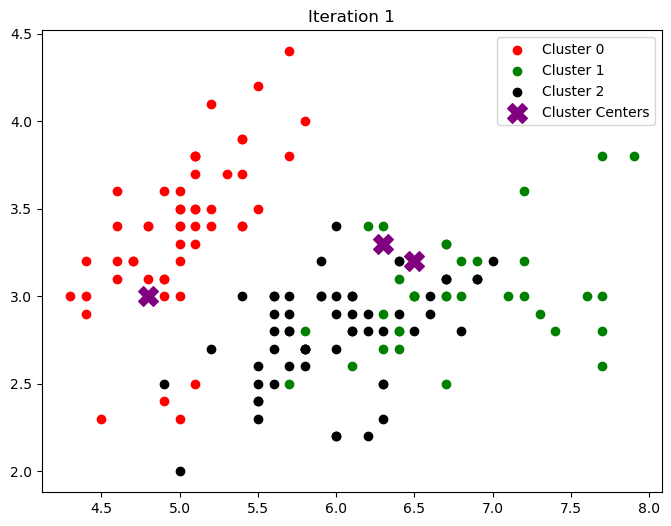

Cluster centers:
[[4.8 3.  1.4 0.1]
 [6.5 3.2 5.1 2. ]
 [6.3 3.3 4.7 1.6]]


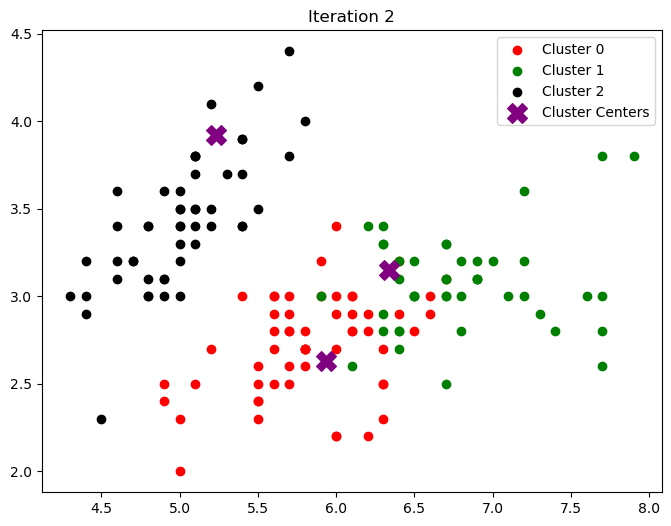

Cluster centers:
[[5.93552952 2.63078803 4.62375259 1.97566587]
 [6.33947684 3.14952346 5.44314009 1.76647161]
 [5.23098142 3.92010099 1.46743549 0.28116528]]


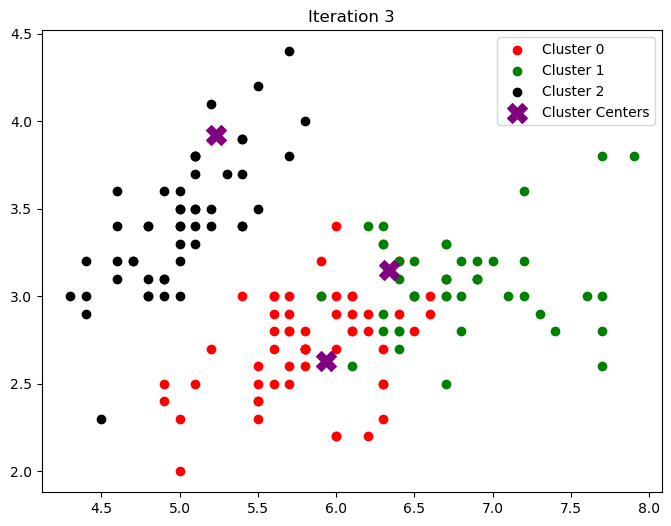

Cluster centers:
[[5.93552952 2.63078803 4.62375259 1.97566587]
 [6.33947684 3.14952346 5.44314009 1.76647161]
 [5.23098142 3.92010099 1.46743549 0.28116528]]


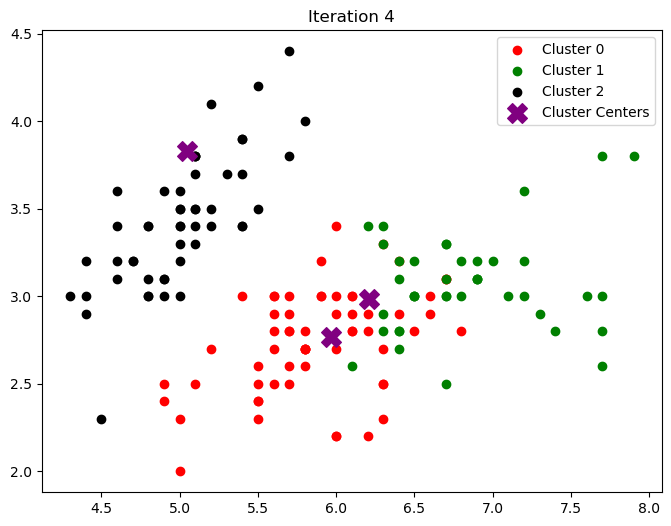

Cluster centers:
[[5.9692282  2.7667266  4.70985351 1.92518477]
 [6.20746257 2.98277127 5.46572237 1.87374258]
 [5.04465139 3.83194112 1.33552019 0.34919358]]


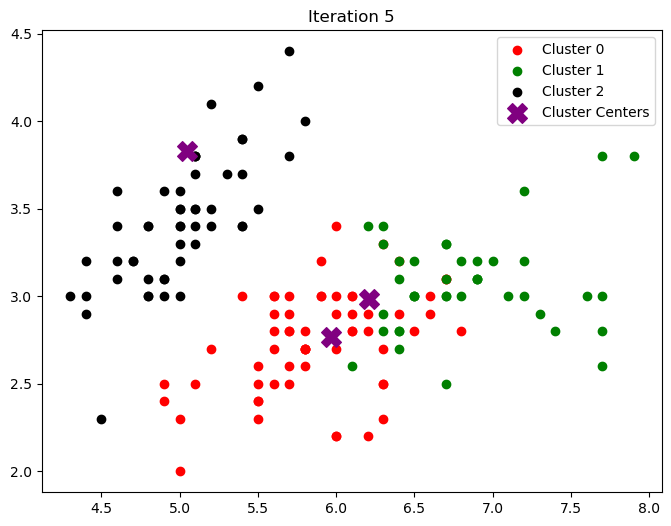

Cluster centers:
[[5.9692282  2.7667266  4.70985351 1.92518477]
 [6.20746257 2.98277127 5.46572237 1.87374258]
 [5.04465139 3.83194112 1.33552019 0.34919358]]


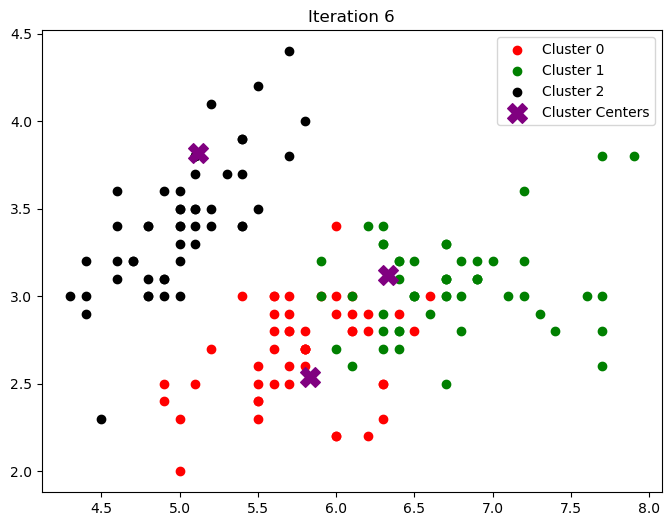

Cluster centers:
[[5.83308158 2.53877641 4.54429635 1.97246825]
 [6.32828861 3.12201935 5.32856472 1.87517159]
 [5.11662089 3.81850497 1.39550744 0.12583667]]


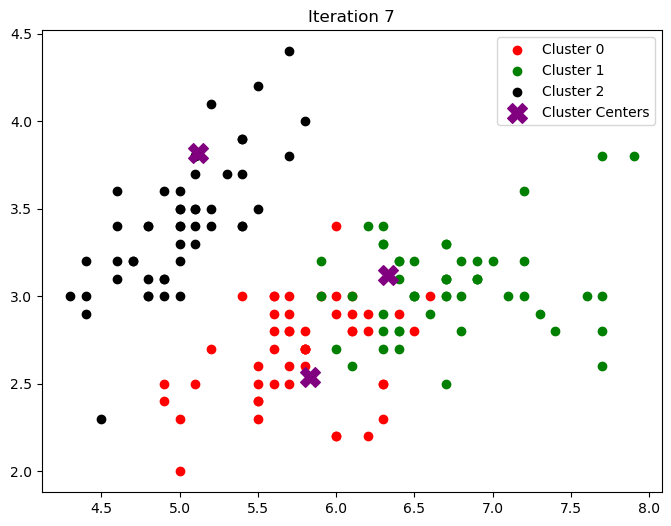

Cluster centers:
[[5.83308158 2.53877641 4.54429635 1.97246825]
 [6.32828861 3.12201935 5.32856472 1.87517159]
 [5.11662089 3.81850497 1.39550744 0.12583667]]


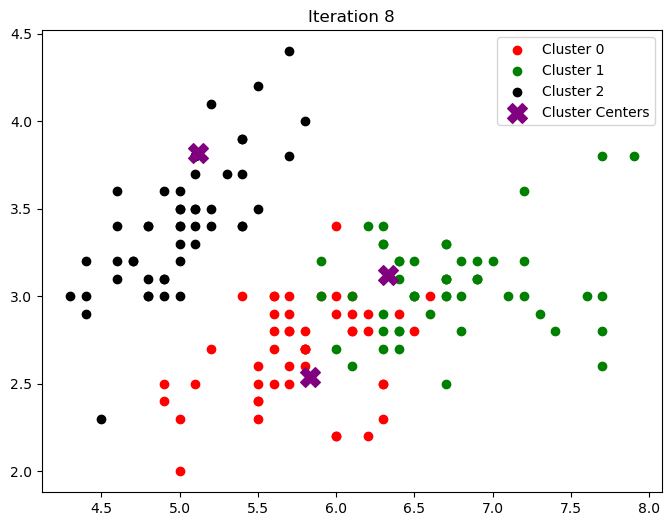

Cluster centers:
[[5.83308158 2.53877641 4.54429635 1.97246825]
 [6.32828861 3.12201935 5.32856472 1.87517159]
 [5.11662089 3.81850497 1.39550744 0.12583667]]


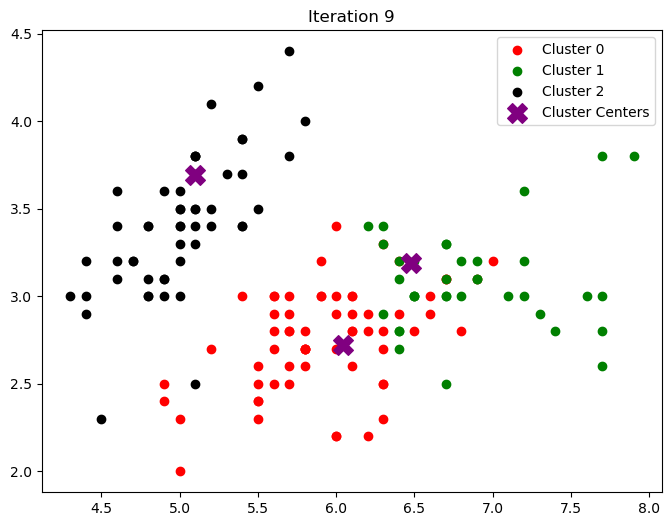

Cluster centers:
[[6.04223367 2.72428765 4.84191987 1.74379069]
 [6.47946783 3.18930604 5.53736276 2.09883374]
 [5.09847143 3.69425265 1.6947391  0.1898586 ]]


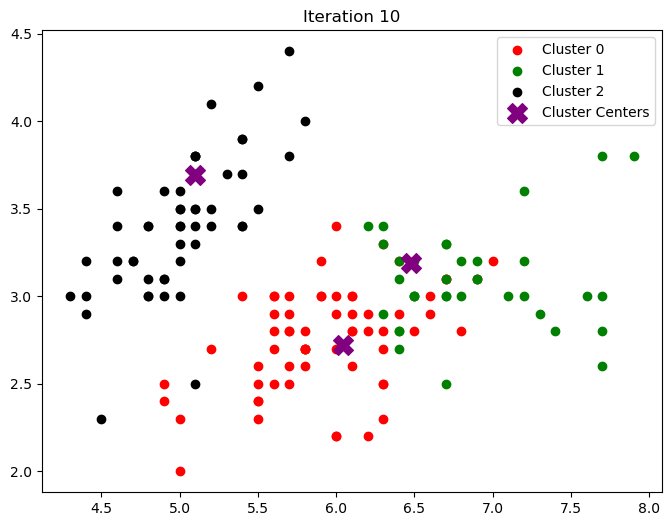

Cluster centers:
[[6.04223367 2.72428765 4.84191987 1.74379069]
 [6.47946783 3.18930604 5.53736276 2.09883374]
 [5.09847143 3.69425265 1.6947391  0.1898586 ]]


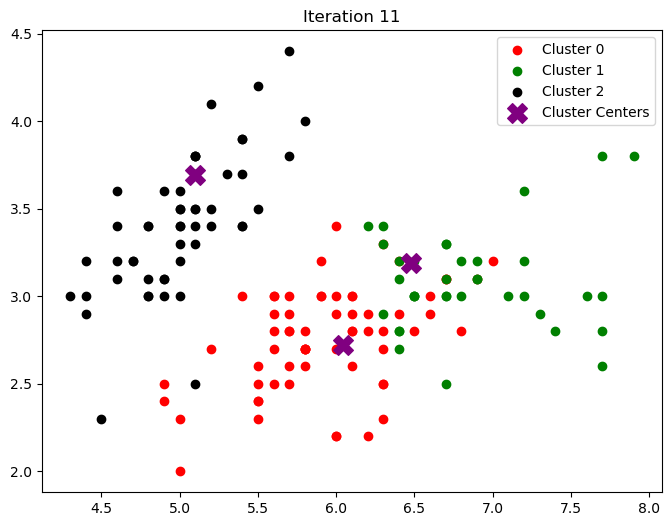

Cluster centers:
[[6.04223367 2.72428765 4.84191987 1.74379069]
 [6.47946783 3.18930604 5.53736276 2.09883374]
 [5.09847143 3.69425265 1.6947391  0.1898586 ]]


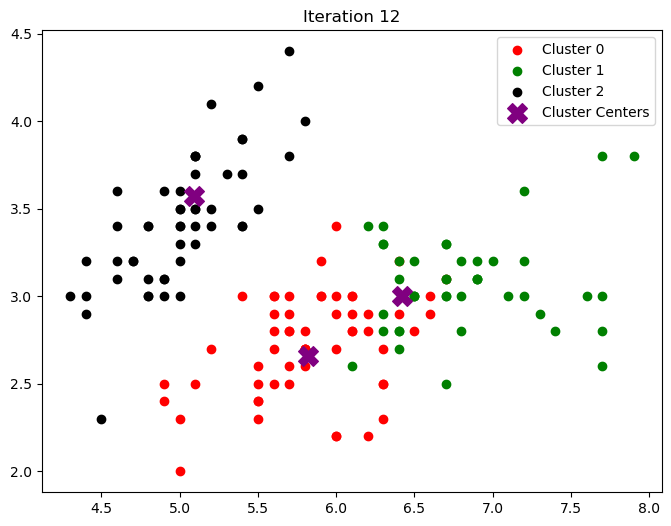

Cluster centers:
[[5.82130198 2.65609593 4.6304198  1.84709954]
 [6.41918222 3.00108713 5.35286774 1.96974549]
 [5.09272746 3.57027068 1.50056516 0.11953386]]


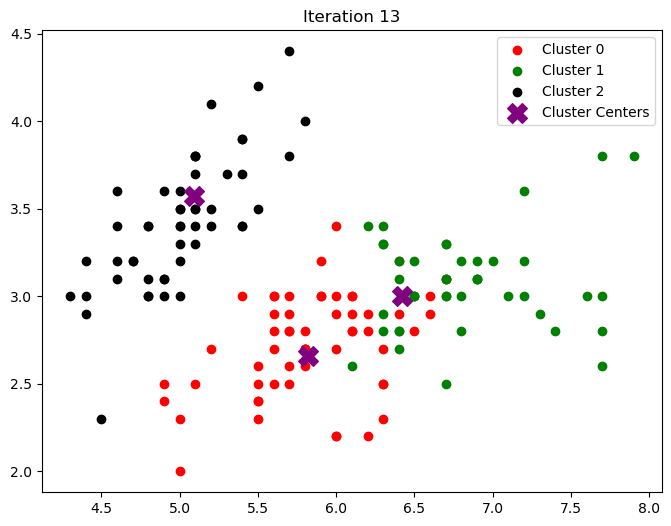

Cluster centers:
[[5.82130198 2.65609593 4.6304198  1.84709954]
 [6.41918222 3.00108713 5.35286774 1.96974549]
 [5.09272746 3.57027068 1.50056516 0.11953386]]


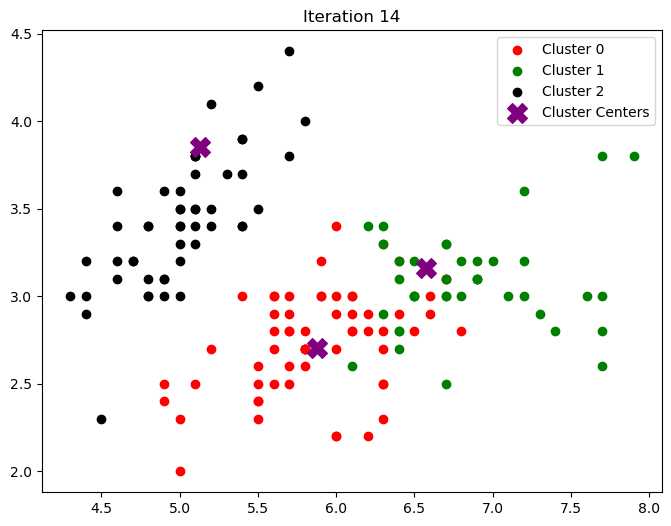

Cluster centers:
[[5.87558099 2.70204459 4.45133294 1.91023   ]
 [6.57315532 3.16423867 5.63715533 2.08045351]
 [5.13179755 3.85215373 1.48017342 0.39330628]]


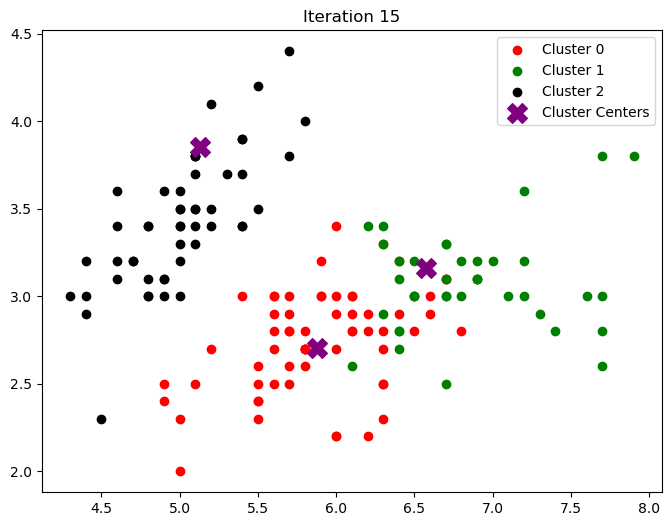

Cluster centers:
[[5.87558099 2.70204459 4.45133294 1.91023   ]
 [6.57315532 3.16423867 5.63715533 2.08045351]
 [5.13179755 3.85215373 1.48017342 0.39330628]]


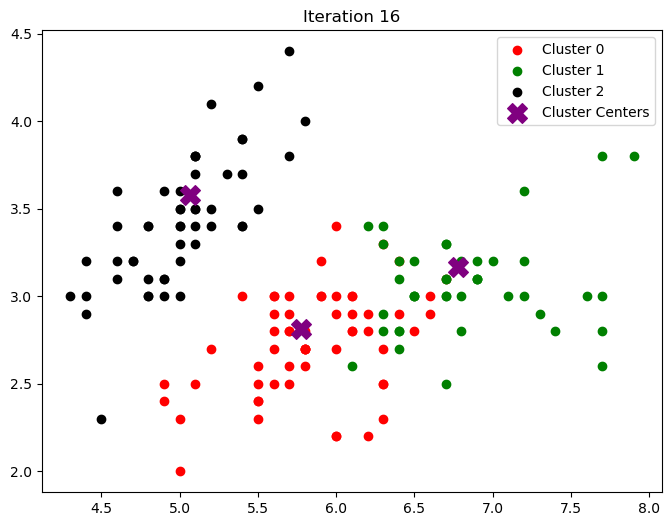

Cluster centers:
[[5.7726244  2.81468231 4.47022919 1.98722812]
 [6.77770784 3.16855685 5.55295394 1.98219039]
 [5.06847948 3.57902927 1.42035036 0.32292446]]


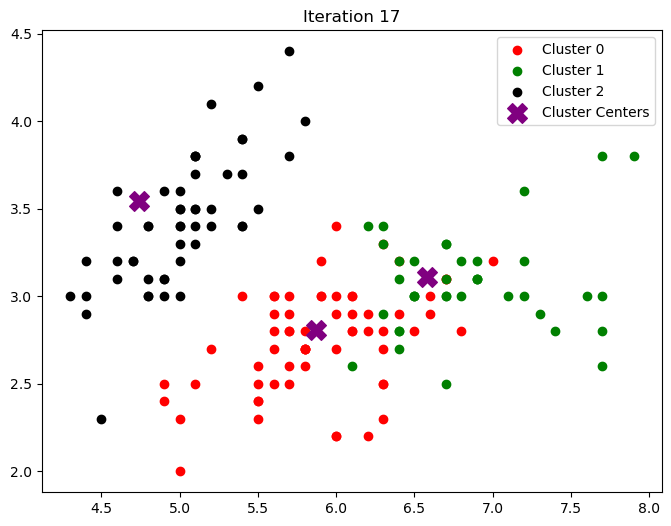

Cluster centers:
[[5.86929572 2.81000359 4.50715207 1.82703016]
 [6.57733702 3.10757082 5.56357376 2.27849639]
 [4.73820216 3.54527049 1.37190901 0.27285377]]


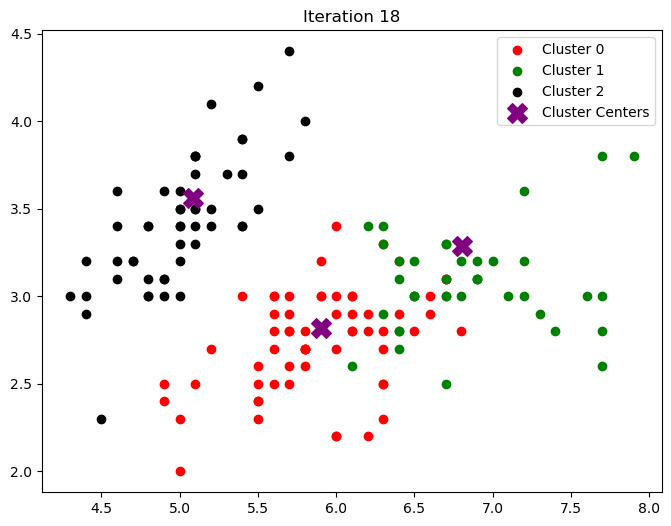

Cluster centers:
[[5.90140783 2.81724286 4.50027945 1.90919318]
 [6.80406162 3.28844739 5.69907229 1.92794144]
 [5.08560436 3.55949842 1.38438177 0.35959624]]


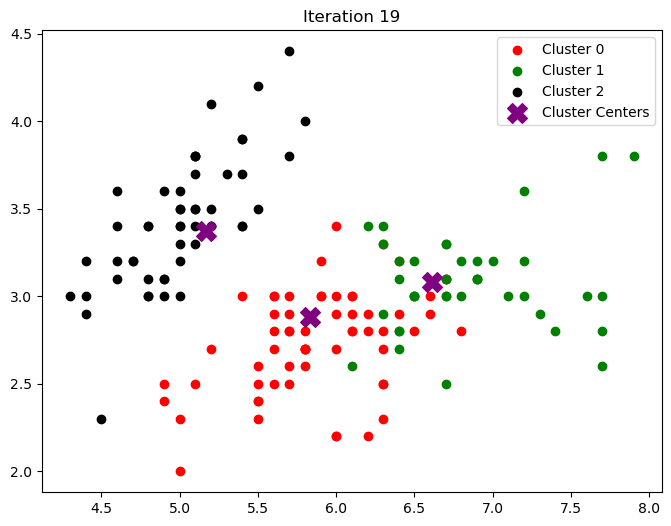

Cluster centers:
[[5.83025012 2.88097457 4.51689272 1.74345532]
 [6.61119803 3.08153669 5.65146235 2.09904412]
 [5.16967463 3.37180695 1.47016691 0.42046927]]


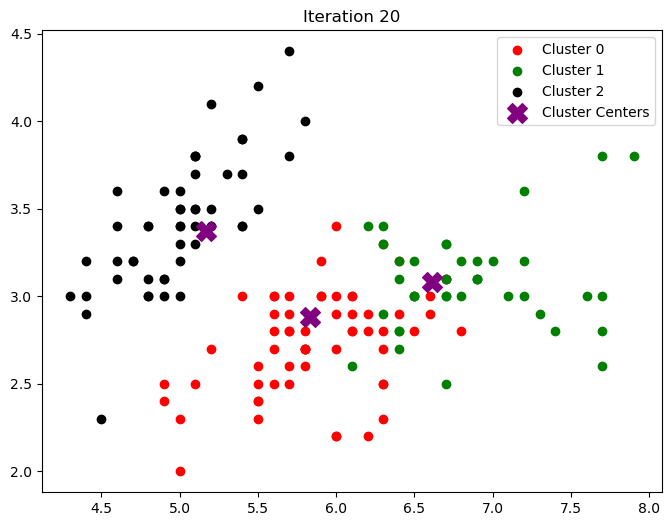

Cluster centers:
[[5.83025012 2.88097457 4.51689272 1.74345532]
 [6.61119803 3.08153669 5.65146235 2.09904412]
 [5.16967463 3.37180695 1.47016691 0.42046927]]


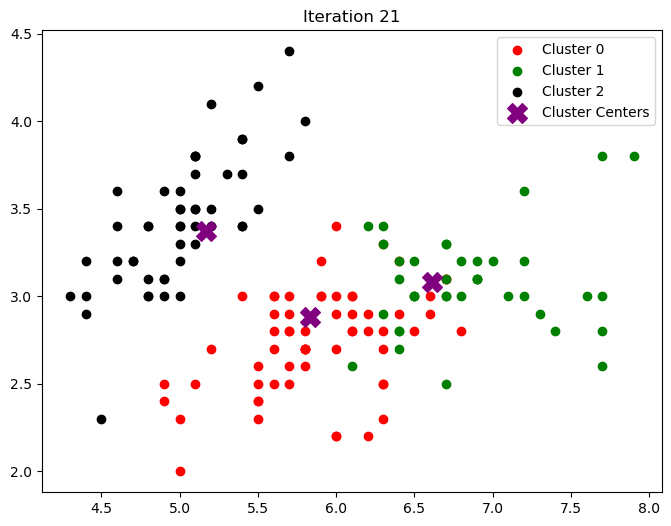

Cluster centers:
[[5.83025012 2.88097457 4.51689272 1.74345532]
 [6.61119803 3.08153669 5.65146235 2.09904412]
 [5.16967463 3.37180695 1.47016691 0.42046927]]


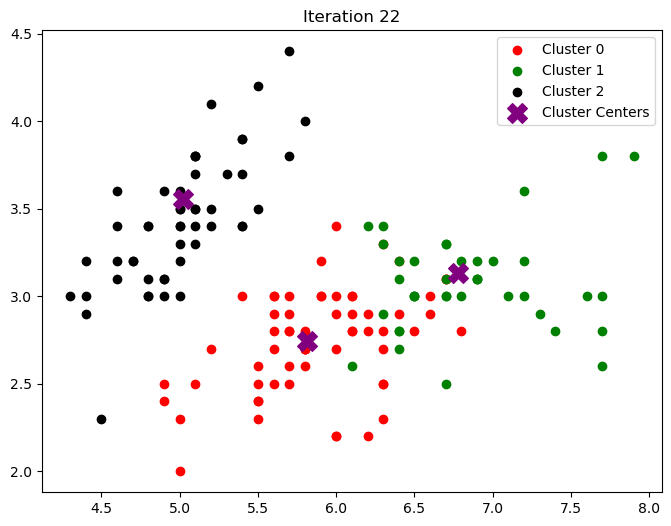

Cluster centers:
[[5.81197227 2.74576266 4.49021992 1.73213816]
 [6.7781711  3.13522098 5.51093053 2.21091041]
 [5.01970959 3.55438524 1.42224091 0.37167637]]


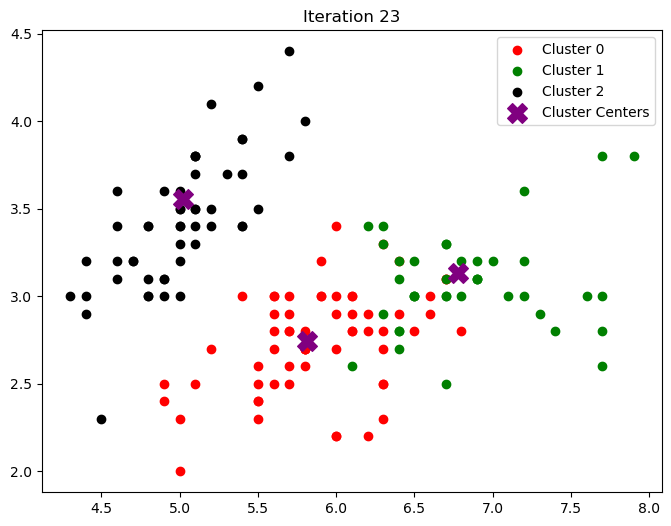

Cluster centers:
[[5.81197227 2.74576266 4.49021992 1.73213816]
 [6.7781711  3.13522098 5.51093053 2.21091041]
 [5.01970959 3.55438524 1.42224091 0.37167637]]


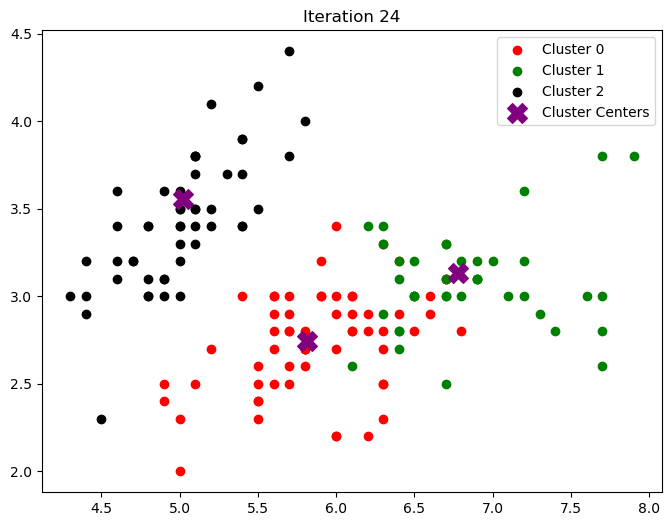

Cluster centers:
[[5.81197227 2.74576266 4.49021992 1.73213816]
 [6.7781711  3.13522098 5.51093053 2.21091041]
 [5.01970959 3.55438524 1.42224091 0.37167637]]


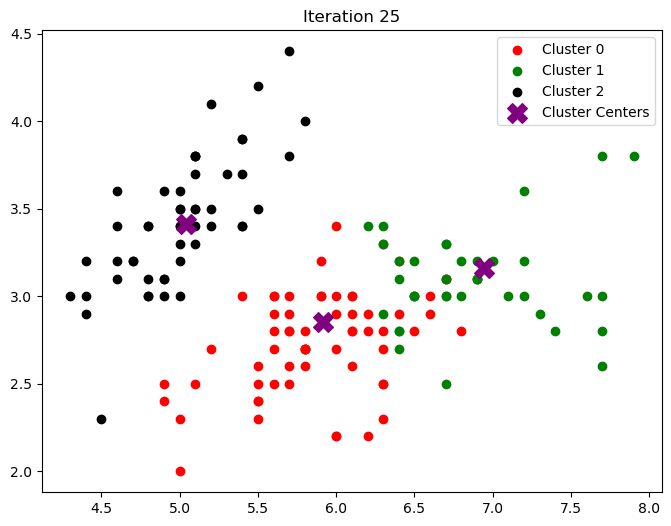

Cluster centers:
[[5.9143029  2.85399897 4.41657367 1.59703036]
 [6.94681732 3.16068895 5.37244832 2.12517059]
 [5.03753963 3.41257469 1.36299547 0.35436341]]


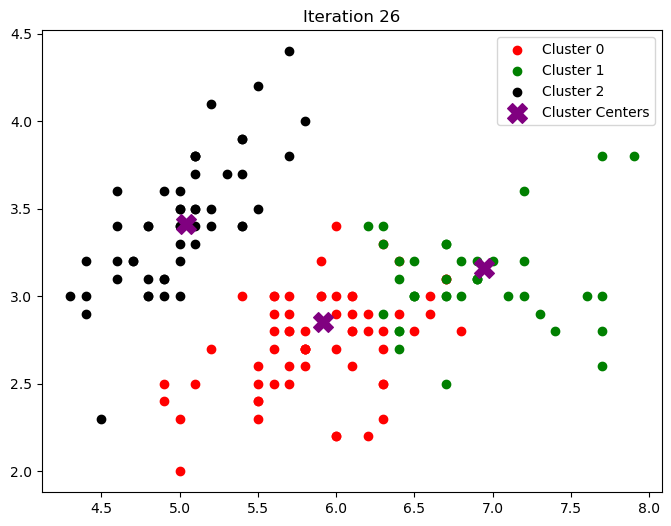

Cluster centers:
[[5.9143029  2.85399897 4.41657367 1.59703036]
 [6.94681732 3.16068895 5.37244832 2.12517059]
 [5.03753963 3.41257469 1.36299547 0.35436341]]


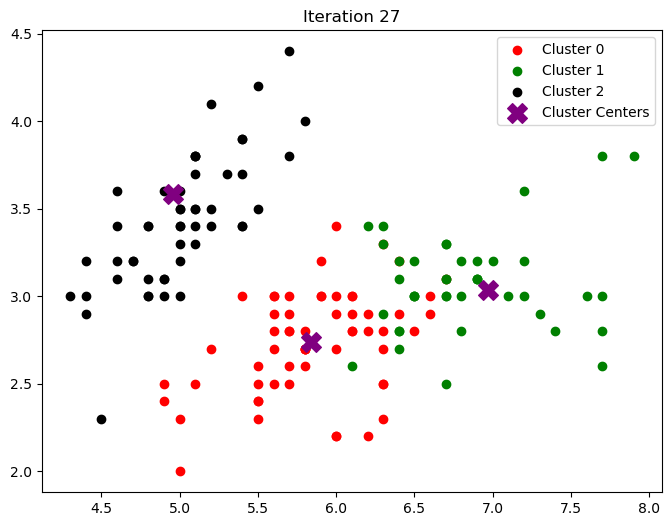

Cluster centers:
[[5.840184   2.74155083 4.36869519 1.54338902]
 [6.97149948 3.0375018  5.33247325 1.97289366]
 [4.95689439 3.58401213 1.35108329 0.24859732]]


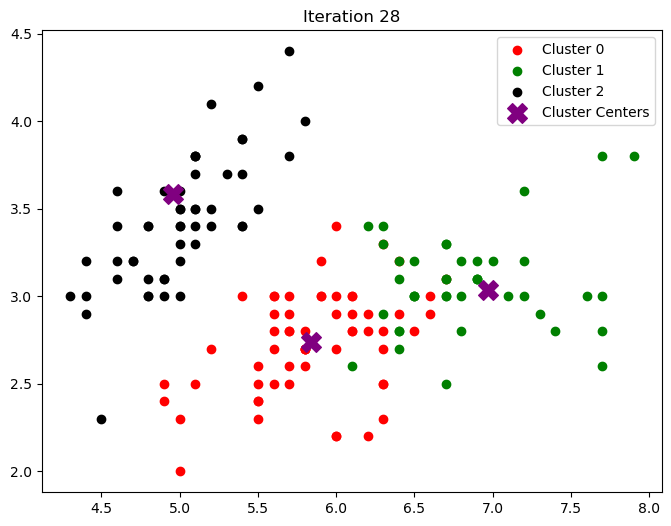

Cluster centers:
[[5.840184   2.74155083 4.36869519 1.54338902]
 [6.97149948 3.0375018  5.33247325 1.97289366]
 [4.95689439 3.58401213 1.35108329 0.24859732]]


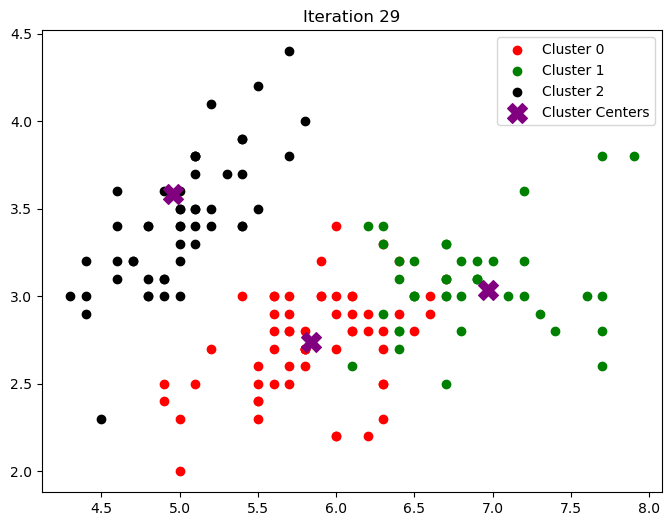

Cluster centers:
[[5.840184   2.74155083 4.36869519 1.54338902]
 [6.97149948 3.0375018  5.33247325 1.97289366]
 [4.95689439 3.58401213 1.35108329 0.24859732]]
Stopping criterion reached: No improvement for 3 iterations.
Best cluster centers found: 
 [[5.840184   2.74155083 4.36869519 1.54338902]
 [6.97149948 3.0375018  5.33247325 1.97289366]
 [4.95689439 3.58401213 1.35108329 0.24859732]]


In [13]:
for iteration in range(max_iterations):
    # Selection of the best individuals
    selected_parents = selection(population, X, k_parents)
    
    # Generating new individuals through crossover and mutation
    offspring = []
    for i in range(len(selected_parents) // 2):  # Pairs of parents
        parent1 = selected_parents[i * 2]
        parent2 = selected_parents[i * 2 + 1]
        child1 = crossover(parent1, parent2)
        child2 = crossover(parent2, parent1)  # Swap parents
        offspring.extend([child1, child2])
    mutated_offspring = [mutate(center) for center in offspring]
    
    # Replacement of the current population with the new population
    population = replacement(population, mutated_offspring, X, k)
    
    # Selection of the best individual (best cluster centers)
    best_solution = min(population, key=lambda x: intra_cluster_fitness(X, x))
    
    # Calculate the fitness of the best solution
    current_best_fitness = intra_cluster_fitness(X, best_solution)
    
    # Check for improvement
    if current_best_fitness < best_fitness:
        best_fitness = current_best_fitness
        stagnation_count = 0  # Reset stagnation count
    else:
        stagnation_count += 1
    
    # Check for stagnation
    if stagnation_count >= max_stagnation:
        print("Stopping criterion reached: No improvement for {} iterations.".format(max_stagnation))
        break
    
    # Visualize clusters at this iteration
    labels = pairwise_distances_argmin_min(X, best_solution)[0]
    visualize_clusters(X[:, :2], best_solution[:, :2], labels, title="Iteration {}".format(iteration + 1))
    print("Cluster centers:")
    print(best_solution)
    
# Return the best solution (cluster centers) encoded in the best individual
best_solution = population[0]
print("Best cluster centers found: \n", best_solution)